ref: https://www.tensorflow.org/guide/tensor

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### **Tensors of different Ranks**

In [2]:
rank_0 = tf.constant(4)
print(rank_0)

tf.Tensor(4, shape=(), dtype=int32)


In [3]:
rank_1 = tf.constant([1,2])
print(rank_1)

tf.Tensor([1 2], shape=(2,), dtype=int32)


In [4]:
rank_2 = tf.constant([[1,2],[3,4],[5,6]])
print(rank_2)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [5]:
rank_3 = tf.constant([
  [[1, 2, 3, 4],
   [5, 6, 7, 8],
   [9, 10, 11, 12]],
  [[13, 14, 15, 16],
   [17, 18, 19, 20],
   [21, 22, 23, 24]]])
print(rank_3)

tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int32)


### **Tensors of Different Data types**

In [6]:
#2D tensor of integers
int_tensor = tf.constant([[1, 2], [3, 4]])
print(int_tensor)

#2D tensor of floats
float_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
print(float_tensor)

#2D tensor of booleans
bool_tensor = tf.constant([[True, False], [False, True]])
print(bool_tensor)

#2D tensor of strings
str_tensor = tf.constant([['Hello', 'World'], ['Goodbye', 'World']])
print(str_tensor)


tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ True False]
 [False  True]], shape=(2, 2), dtype=bool)
tf.Tensor(
[[b'Hello' b'World']
 [b'Goodbye' b'World']], shape=(2, 2), dtype=string)


### **Convert Tensor to Numpy array**

In [7]:
np.array(rank_3)

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)

In [8]:
rank_3.numpy()

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)

### **Convert array to Tensor**

In [9]:
new_tf_=tf.convert_to_tensor([1,2,3])
print(new_tf_)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


### **Indexing**

In [10]:
rank_1_ = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print("Everything:", rank_1_[:].numpy())
print("Before 4:", rank_1_[:4].numpy())
print("From 4 to the end:", rank_1_[4:].numpy())
print("From 2, before 7:", rank_1_[2:7].numpy())
print("Every other item:", rank_1_[::2].numpy())
print("Reversed:", rank_1_[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


In [11]:
#Multi-axis indexing
print("Second row:", rank_2[1, :].numpy())
print("Second column:", rank_2[:, 1].numpy())
print("Last row:", rank_2[-1, :].numpy())
print("First item in last column:", rank_2[0, -1].numpy())
print("Skip the first row:")
print(rank_2[1:, :].numpy(), "\n")

Second row: [3 4]
Second column: [2 4 6]
Last row: [5 6]
First item in last column: 2
Skip the first row:
[[3 4]
 [5 6]] 



### **Tensor Operations**

In [12]:
# Transposing the tensor
tf.transpose(rank_2)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]], dtype=int32)>

In [13]:
# Adding each element of tensor by a constant value
rank_2 + 5

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 6,  7],
       [ 8,  9],
       [10, 11]], dtype=int32)>

In [14]:
# Multiplying each element of tensor by a constant value
rank_2 * 5

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 5, 10],
       [15, 20],
       [25, 30]], dtype=int32)>

In [15]:
# Squaring each element of the tensor
tf.square(rank_2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 1,  4],
       [ 9, 16],
       [25, 36]], dtype=int32)>

In [16]:
# New 2D tensor
new_mat = tf.constant([[1,2],[3,4],[8,8]])
# Adding 2 tensors
sum=tf.add(rank_2,new_mat)
print(sum)

tf.Tensor(
[[ 2  4]
 [ 6  8]
 [13 14]], shape=(3, 2), dtype=int32)


In [17]:
# Element wise multiplication of the tensors
# Check for the dimensions of both the tensors before multiplying them
product_1=rank_2 * new_mat

print(product_1)

tf.Tensor(
[[ 1  4]
 [ 9 16]
 [40 48]], shape=(3, 2), dtype=int32)


In [18]:
# Multiplying two tensors using @
# Check for the dimensions of both the tensors before multiplying them
product_2=rank_2 @ tf.transpose(new_mat)

print(product_2)

tf.Tensor(
[[ 5 11 24]
 [11 25 56]
 [17 39 88]], shape=(3, 3), dtype=int32)


### **Few more Tensors operations**

In [19]:
# Finding the largest value in the tensor
print(tf.reduce_max(float_tensor))

tf.Tensor(4.0, shape=(), dtype=float32)


In [20]:
# Finding the index of the largest value
print(tf.math.argmax(float_tensor))

tf.Tensor([1 1], shape=(2,), dtype=int64)


In [21]:
# Softmax of the tensor values
print(tf.nn.softmax(float_tensor))

tf.Tensor(
[[0.26894143 0.7310586 ]
 [0.26894143 0.7310586 ]], shape=(2, 2), dtype=float32)


In [22]:
print("Type of every element:", rank_3.dtype)
print("Number of axes:", rank_3.ndim)
print("Shape of tensor:", rank_3.shape)
print("Elements along axis 0 of tensor:", rank_3.shape[0])
print("Elements along the last axis of tensor:", rank_3.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_3).numpy())

Type of every element: <dtype: 'int32'>
Number of axes: 3
Shape of tensor: (2, 3, 4)
Elements along axis 0 of tensor: 2
Elements along the last axis of tensor: 4
Total number of elements (3*2*4*5):  24


### **String Tensor Operations**

In [23]:
# You can use split to split a string into a set of tensors
scalar_string_tensor = tf.constant("Gray wolf")
print(tf.strings.split(scalar_string_tensor, sep=" "))
# In the printout the b prefix indicates that tf.string dtype is not a unicode string, but a byte-string.

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [24]:
# Although you can't use tf.cast to turn a string tensor into numbers, you can convert it into bytes, and then into numbers.
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


### **Tensor Reshaping**

In [25]:
print(rank_3)
print("rank_3 tensor current shape",rank_3.shape)


tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int32)
rank_3 tensor current shape (2, 3, 4)


In [26]:
#The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data.
#TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.

# To visulaize the data in the tensor to see the order of the data points
print(tf.reshape(rank_3, [-1]))

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24], shape=(24,), dtype=int32)


In [27]:
# Reshaping tensor
reshaped = tf.reshape(rank_3, [4, 2, 3])
print(reshaped)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]]], shape=(4, 2, 3), dtype=int32)


In [28]:
print("Previous Shape",rank_3.shape)
print("After reshape",reshaped.shape)

Previous Shape (2, 3, 4)
After reshape (4, 2, 3)


### **Ragged Tensors**


In [29]:
# A tensor with variable numbers of elements along some axis is called "ragged".
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [30]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [31]:
# Instead create a `tf.RaggedTensor` using `tf.ragged.constant`:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


In [32]:
# The shape of a `tf.RaggedTensor` will contain some axes with unknown lengths:
print(ragged_tensor.shape)

(4, None)


### **Image Tensor Representation**

In [33]:
# Load the data
from tensorflow.keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


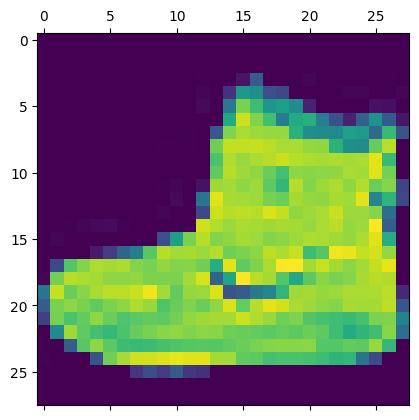

In [34]:
#Let us see the first image in the training data
plt.matshow(X_train_full[0])


In [35]:
# the data of the image is in array format
X_train_full[0].shape

(28, 28)

In [36]:
# Coverting the array to Tensorflow
new_tf_mnist = tf.convert_to_tensor(X_train_full[0])
new_tf_mnist.shape

TensorShape([28, 28])